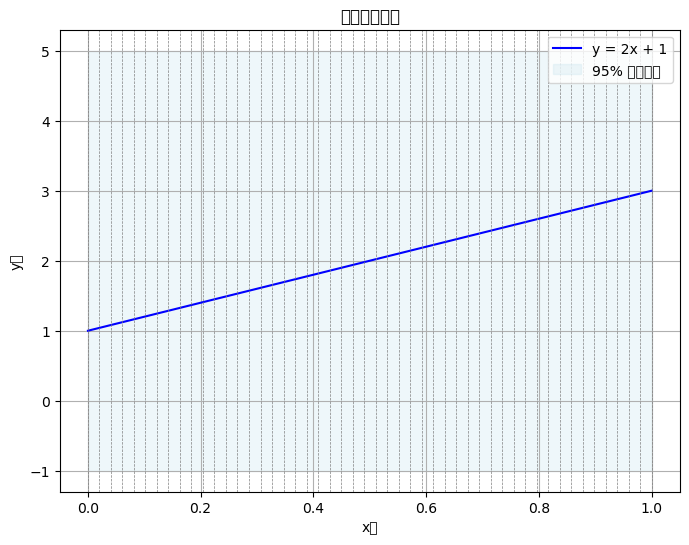

In [5]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import random
# Initialize the model with priors
prior_mean = 0
prior_variance = 1
precision = 1 / prior_variance

# Initialize empty lists to store predictive distributions
predicted_means = []
predicted_variances = []

# Sequentially update the model and make predictions for each data point
for x_new, y_new in zip(X_data, y_data):
    # Update the model with the new data point
    posterior_precision = precision + x_new**2
    posterior_mean = (prior_mean * precision + x_new * y_new) / posterior_precision
    
    # Compute the predictive distribution
    predictive_mean = posterior_mean
    predictive_variance = 1 / posterior_precision + prior_variance
    
    # Store the results
    predicted_means.append(predictive_mean)
    predicted_variances.append(predictive_variance)
    
    # Update the priors for the next iteration
    prior_mean = predictive_mean
    prior_variance = predictive_variance
    precision = 1 / prior_variance

# Plot the predictive distribution for each data point
plt.figure(figsize=(10, 6))
plt.plot(X_true, true_function(X_true), label='True Function', color='blue')
plt.scatter(X_data, y_data, label='Noisy Data', color='red', marker='o')

# Plot the predictive distribution for each data point sequentially
for i in range(len(X_data)):
    predictive_stddev = np.sqrt(predicted_variances[i])
    predictive_upper = predicted_means[i] + 1.96 * predictive_stddev  # 95% confidence interval
    predictive_lower = predicted_means[i] - 1.96 * predictive_stddev  # 95% confidence interval
    
    plt.plot([X_data[i], X_data[i]], [predictive_lower, predictive_upper], color='green', alpha=0.6)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Predictive Distribution for Noisy Data (Sequentially)')
plt.legend()
plt.grid(True)
plt.show()
